In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import trajectory_reconstruction_tradeoff as T



/cs/labs/mornitzan/nomoriel/miniconda3/envs/traj2/lib/python3.8/site-packages/pyslingshot/slingshot.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# config
outdir = '../output/'
to_save = True
dataset = 'hayashi'
method = 'dpt'

In [3]:
L_tradeoff = T.io.read_output(dataset, outdir=outdir, sample='exp')

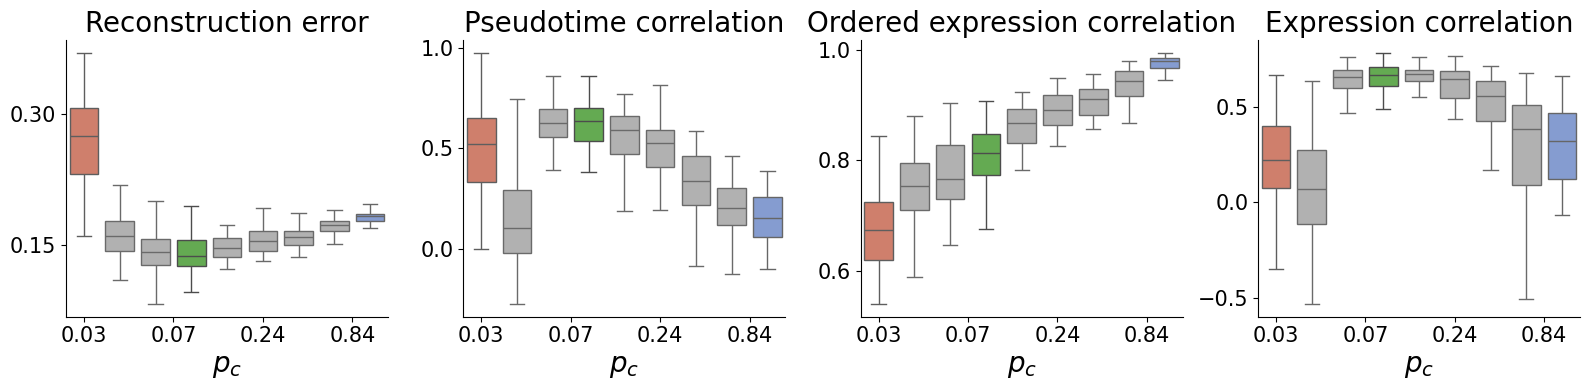

In [4]:
# plot expression correlation
err_fit = 'l1'
pc_opt = L_tradeoff.groupby('pc')[err_fit].median().idxmin()
pc_low = L_tradeoff['pc'].min()
pc_high = L_tradeoff['pc'].max()
Pcs_h = [pc_low, pc_opt, pc_high]
nrows = 1
ncols = 4
fig, ax = plt.subplots(nrows,ncols, figsize=(ncols*4, nrows*4), constrained_layout=True, tight_layout=True)
T.pl.plot_tradeoff_dw(L_tradeoff, Pcs_h, ycol='l1', title='Reconstruction error', ax=ax[0])
T.pl.plot_tradeoff_dw(L_tradeoff, Pcs_h, ycol=f'{method}_corr', title='Pseudotime correlation', ax=ax[1])
T.pl.plot_tradeoff_dw(L_tradeoff, Pcs_h, ycol=f'{method}_ordered_exp_corr', title='Ordered expression correlation', ax=ax[2])
T.pl.plot_tradeoff_dw(L_tradeoff, Pcs_h, ycol=f'{method}_exp_corr', title='Expression correlation', ax=ax[3])